<a href="https://colab.research.google.com/github/m1key/raspberry-pi/blob/master/moist/Moisture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

url = 'https://raw.githubusercontent.com/m1key/raspberry-pi/master/moist/moisture.csv'
df = pd.read_csv(url, sep=",", names=['datetime', 'temperature', 'moisture'])
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')
df = df.groupby(pd.Grouper(freq="5min")).mean()
df = df.reset_index()
df.iloc[[0, -1]]

,datetime,temperature,moisture
0,2020-05-08 19:55:00,21.654583,858.962963
182,2020-05-09 11:05:00,23.929017,902.343066


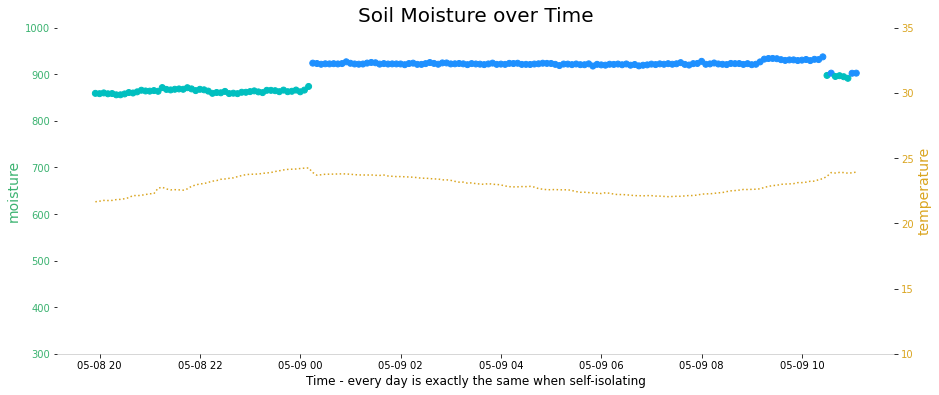

In [9]:
import matplotlib.pyplot as plt

import numpy as np
colors = np.where(df["moisture"] > 900, 'dodgerblue', 
         (np.where(df["moisture"] > 800, 'c',
                   (np.where(df["moisture"] > 500, 'mediumseagreen',
                       (np.where(df['moisture'] > 400, 'yellowgreen', 'yellow')))))))

fig, ax = plt.subplots(1, figsize=(15,6))
ax.scatter(df['datetime'], df['moisture'], c=colors)
ax.set_ylabel('moisture', color='mediumseagreen', fontsize=14)
ax.tick_params(axis='y', labelcolor='mediumseagreen')
ax.set_ylim(300, 1000)
ax.set_xlabel('Time - every day is exactly the same when self-isolating', fontsize=12)

ax2 = ax.twinx()
ax2.plot(df['datetime'], df['temperature'], linestyle='dotted', color='goldenrod')
ax2.set_ylabel('temperature', color='goldenrod', fontsize=14)
ax2.tick_params(axis='y', labelcolor='goldenrod')
ax2.set_ylim(10, 35)

plt.title('Soil Moisture over Time', fontsize=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_alpha(0.0)
ax.spines['bottom'].set_alpha(0.1)

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_alpha(0.0)
ax2.spines['bottom'].set_alpha(0.1)

plt.show()